In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import pickle

In [2]:
#Loading the dataset
br = pd.read_csv('bike_rental.csv')
br.head()

,Date,Rented Bike Count,Temperature(C)
0,01/12/2017,254,-5.2
1,01/12/2017,204,-5.5
2,01/12/2017,173,-6.0
3,01/12/2017,107,-6.2
4,01/12/2017,78,-6.0


In [3]:
#Droping Date Column
br.drop('Date', inplace=True, axis=1)
br.head()

,Rented Bike Count,Temperature(C)
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0


In [4]:
#Defining x and y variable
x=br['Temperature(C)'].to_numpy()
y=br['Rented Bike Count'].to_numpy()

#Creating Train and Test Datasets with 8:2 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 100)

#Converting variables to 2D
x_train2 = x_train.reshape(-1,1)
x_test2 = x_test.reshape(-1,1)

#Fitting a Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train2, y_train)

y_pred = model.predict(x_test2)

#Model parameters
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)


Intercept: 333.1196715709861
Coefficient: [28.64275136]


In [5]:
#RMSE and r2 of the model
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

#r2
r2 = model.score(x_train2, y_train)
print("R_sqr:", r2)

RMSE: 547.6236724292579
R_sqr: 0.28621277046987326


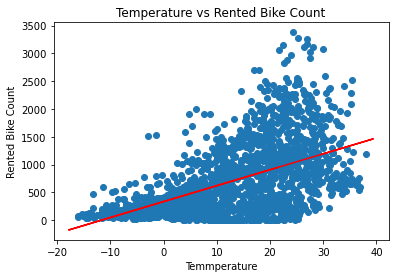

In [6]:
#Plotting a scatter plot with test dataset and the trained model
plt.scatter(x_test2, y_test)
plt.plot(x_train2, model.predict(x_train2), color = 'red')
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temmperature')
plt.ylabel('Rented Bike Count')
plt.show()

In [7]:
#Saving model to disk
pickle.dump(model, open('brmodel.pkl','wb'))

In [8]:
#Prediction using saved model on Temperature -6
savedmodel = pickle.load( open('brmodel.pkl','rb'))
y_new = savedmodel.predict([[-6]])
print(y_new)

[161.26316341]
